# Function to automatic merge and fill missing values



## Create the function
You have to create a function which take 2 arguments :
- argument 1 : DataFrame main
- argument 2 : DataFrame opinion

Your function will return a new DataFrame which is the left merge of both DataFrames, and which has no missing values (so your function has to fill them), add new columns (flag, MONTH and DAY), and OPINION should be translated.

So you have to copy each useful code from the previous quests, and integrate it into a function. **This should achieve the same results as the previous quests.**

In [4]:
import pandas as pd
link_main = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0  2018-01-01                 12                  8                 61   
1  2018-01-02                 13                  6                 26   
2  2018-01-03                 15                 10                 40   
3  2018-01-04                 14                 11                 45   
4  2018-01-05                 12                  7                 21   

   TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0                      9                  11                      8   
1                      8                  12                     13   
2                     11                  12                     10   
3                     14                  14                     11   
4                     10                  11                      8   

   PRECIP_TOTAL_DAY_MM  HUMIDITY_MAX_PERCENT  VISIBILITY_AVG_KM  \
0                  8.9                    79              9.5

In [5]:
import pandas as pd
# debug function
# start_year, end_year = 2017, 2020
"""
Fonction qui entre une place de 2 dates, crée le dataframe en mergeant puis concantenant les dataframe en fonction de leur date, les liens github étant différent entre la plage avant 2019 il faut merge 2 fichier main et opinion, aprés 2019 les fichiers sont deja mergés
Pour faire le merge il renomme aussi la colonne 'date' de opinion en 'DATE'
"""


def create_df_wild_with2date(start_year, end_year):

    import pandas as pd
    # Initiate an empty DataFrame
    dftotal = pd.DataFrame()

    df_year = pd.DataFrame()

    # Collect both DataFrames each year

    plage_year = [year for year in range(start_year, end_year)]
    for var_year in plage_year:
        year = str(var_year)
        if var_year < 2019:
            # print(var_year)
            year = str(var_year)
            link_main = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather_main_" + year + ".csv"
            link_opinion = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather_opinion_" + year + ".csv"
            df_main = pd.read_csv(link_main)
            df_opinion = pd.read_csv(link_opinion)
            # Apply your merge, cleaning and fillna function on the current year
            df_year = mergeDF(df_main, df_opinion)
            dftotal = pd.concat([dftotal, df_year])
        if var_year >= 2019:
            # for var_year in plage_year:
            # year = str(var_year)
            # Chaque année depuis 2019 (inclus) a une seule source avec ce format de nom de fichier : weatherYYYY.csv
            link_year_up2019 = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather" + year + ".csv"
            df_year_up2019 = pd.read_csv(link_year_up2019)
            # df_year_up2019 = df_year.rename(
            #     columns={'date': 'DATE'}, inplace=True)
            # Concat with the global DF
            dftotal = pd.concat([dftotal, df_year_up2019])

    return dftotal


def mergeDF(df_main, df_opinion):
    df_opinion.rename(columns={'date': 'DATE'}, inplace=True)
    dfnew = pd.merge(left=df_main,
                     right=df_opinion,
                     left_on='DATE',
                     right_on="DATE",
                     how='left')
    # on va renommer la colonne date avec le meme format que la table main
    # liste_colonnes_opinion = df_opinion.columns.to_list()
    # print(liste_colonnes_opinion)
    return dfnew

In [6]:
# dftotal = create_df_wild_with2date(2017, 2018)

In [7]:
# mergeDF(df_main, df_opinion)

In [8]:
dftotal = create_df_wild_with2date(2017, 2020)

### INFOS SUR LE DATASET

In [9]:
# INFOS SUR LE DATASET
"""fonction resumant les informations essentielles à connaittre sur un dataset
"""


def info_dataframe(dataframe):
    df = dataframe
    print("\ntaille: ", df.size, "valeurs.", " \nDimensions:", df.shape)
    print("\nNombre de na:", df.isna().all().size,
          "\nNombre de null:", df.isnull().all().size)
    print("\nliste nom des colonnes: \n", df.columns)
    print("\nliste colonnes comportant des NA: \n", df[df.isna()].columns)
    try:
        print("\nliste nom des valeurs uniques par ligne: \n",
              df[df.iloc[:, 1:]].value.unique())
        for col in df.columns[1:]:
            if df[col].dtype == 'object' and df[col].dtype != 'int*' and df[col].dtype != 'float*':
                print(f"\nValeurs uniques pour {col} : \n", df[col].unique())
    except:
        print("\nil y a trop de colonnes pour sortir les valeurs uniques de chacunes\n")
        # pass
    try:
        print("\nInfo")
        print(df.info())
        print("\nDescribe")
        print(df.describe())
        print("\nHead")
        print(df.head(5))
    except:
        print("dataFrame inexploitable, veuillez le verifier")
    return

In [10]:
# test fonction info
info_dataframe(dftotal)


taille:  26280 valeurs.  
Dimensions: (1095, 24)

Nombre de na: 24 
Nombre de null: 24

liste nom des colonnes: 
 Index(['DATE', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'WEATHER_CODE_EVENING',
       'TOTAL_SNOW_MM', 'UV_INDEX', 'SUNHOUR', 'OPINION',
       'WEATHER_CODE_MORNING', 'WEATHER_CODE_NOON', 'MONTH', 'DAY'],
      dtype='object')

liste colonnes comportant des NA: 
 Index(['DATE', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', '

## MAKE A FUNCTION TO CREATE DATAFRAMES

In [11]:
# test
try:
    print(dftotal["DATE"])
except:
    print(dftotal.index)

0      2017-01-01
1      2017-01-02
2      2017-01-03
3      2017-01-04
4      2017-01-05
          ...    
360    2019-12-27
361    2019-12-28
362    2019-12-29
363    2019-12-30
364    2019-12-31
Name: DATE, Length: 1095, dtype: object


In [12]:
# def merge_and_fill(DataFrameMain, DataFrameOpinion):
"""
Cette fonction ajoute les colonnes FLAG, DAY and MONTH, puis traite les na et enfin traduit en francais les appréciations de OPINION
"""


def add_col_and_fill(dftotal):
    import numpy as np
    # Initialisation du dataframe de sortie
    df = pd.DataFrame
    df = dftotal
    #
    # MERGE déja intégré dans la fonction create_df_wild_with2date()
    #  formatage colonne date en date, si déja fait on ne fait pas
    try:
        df['DATE'] = pd.to_datetime(df['DATE'])
        df.set_index('DATE', inplace=True)
    except:

        pass
    # FILL IN MISSING VALUES
    # remplacement de na par 0
    liste_colonnes_nulle = ["TOTAL_SNOW_MM", ]
    for column_name in liste_colonnes_nulle:
        df[column_name] = df[column_name].fillna(0, inplace=True)
    # remplacement de na par la valeur mediane
    liste_colonnes_mediane = ["WEATHER_CODE_EVENING"]
    for column_name in liste_colonnes_mediane:
        median_value = df[column_name].median()
        df[column_name] = df[column_name].fillna(median_value, inplace=True)
    # "UV_INDEX"
    # remplacement de na par bfill et ffill
    liste_colonnes_mediane = ["UV_INDEX"]
    for column_name in liste_colonnes_mediane:
        df[column_name] = df[column_name].fillna(method='ffill', inplace=True)
        df[column_name] = df[column_name].fillna(method='bfill', inplace=True)
        # Remplir les valeurs manquantes restantes avec 0
        df[column_name] = df[column_name].fillna(0, inplace=True)
    # ADD NEW COLUMNS
    try:
        # ajout colonne DAY
        df['DAY'] = df.index.day
        # ajout colonne Month
        df['MONTH'] = df.index.month
        # colonne flag
        df['flag'] = df['OPINION'].isna()
        df['flag'].value_counts()
    except:

        pass
    # "OPINION"
    # remplacement de na par unknown
    liste_colonnes_mediane = ["OPINION"]
    for column_name in liste_colonnes_mediane:
        df[column_name] = df[column_name].fillna("unknown", inplace=True)
    # remplacement des valeurs manquantes des colonnes int ou float par 0
    # sinon remplacement des valeurs manquantes des colonnes objet par unkwon
    for column in df.columns[df.isna().all()]:
        if np.issubdtype(df[column].dtype, np.number):
            df[column].fillna(0, inplace=True)
        # else:
        #     df[column].fillna("unknown", inplace=True)
    #  Verification qu'il ne reste plus de valeurs na
    # for column in df.columns:
    #     print("I have ", df.isna().all().size,
    #           "missing values in the column", column)
    # TRANSLATE OPINION
    df['OPINION'] = df['OPINION'].apply(translate)

    return df


def translate(opinion):
    try:
        # nettoyage et typage de la variable
        opinion = str(opinion).strip().lower()
        # print(opinion)
        translations = {
            "very bad": "très mauvais",
            "bad": "mauvais",
            "not good not bad": "ni bon ni mauvais",
            "good": "bon",
            "very good": "très bon"
        }

        return translations[opinion]

    except KeyError:
        return opinion

In [13]:
# test de la fonction
# add_col_and_fill(dftotal)

## Execution with a loop
You will execute your function in a 9 rounds loop, once per year, and agregate this in a new big DataFrame with 24 columns and lots of rows.

In [14]:
# Each year between 2010 and 2018 (included) has 2 sources : weather_main_YYYY.csv and weather_opinion_YYYY.csv

# for year in range(2010, 2019):
dftotal = create_df_wild_with2date(2010, 2019)

In [15]:
dftotal.shape

(3287, 20)

In [16]:
add_col_and_fill(dftotal)

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,...,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,DAY,MONTH,flag
DATE,,,,,,,,,,,,,,,,,,,,,
2010-01-01,5,2,19,2,5,3,0.0,86,10.000,1012,...,3,-1,None,None,None,5.1,none,1,1,False
2010-01-02,5,-1,6,-1,4,1,0.0,78,10.000,1022,...,0,2,None,None,None,8.7,none,2,1,False
2010-01-03,5,1,26,2,4,2,0.3,61,9.875,1021,...,0,-3,None,None,None,6.9,none,3,1,False
2010-01-04,1,-4,25,-2,0,-3,0.0,75,10.000,1017,...,0,-9,None,None,None,8.7,none,4,1,False
2010-01-05,2,-5,20,-5,1,-4,0.0,71,10.000,1012,...,0,-10,None,None,None,8.7,none,5,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,7,2,6,2,6,5,0.0,85,10.000,1027,...,6,3,None,None,None,8.7,none,27,12,False
2018-12-28,7,2,8,2,7,3,0.0,89,8.000,1035,...,4,4,None,None,None,8.7,none,28,12,False
2018-12-29,7,1,6,1,6,4,0.0,94,7.000,1038,...,5,1,None,None,None,8.7,none,29,12,False


In [17]:
# test fonction info
info_dataframe(dftotal)


taille:  72314 valeurs.  
Dimensions: (3287, 22)

Nombre de na: 22 
Nombre de null: 22

liste nom des colonnes: 
 Index(['MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'WEATHER_CODE_EVENING',
       'TOTAL_SNOW_MM', 'UV_INDEX', 'SUNHOUR', 'OPINION', 'DAY', 'MONTH',
       'flag'],
      dtype='object')

liste colonnes comportant des NA: 
 Index(['MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'WEATHER_CODE_EVENING',
       'TOTA

## Add 2019 to 2022

In [18]:
# Each year since 2019 (included) has 1 source : weatherYYYY.csv
# Chaque année depuis 2019 (inclus) a une seule source avec ce format de nom de fichier : weatherYYYY.csv
link2019 = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather2019.csv"

In [19]:
def compile_dataframe_and_fill(year1, year2):
    # del dftotal
    dftotal_big = pd.DataFrame
    dftotal_big = create_df_wild_with2date(year1, year2)
    dftotal_big = add_col_and_fill(dftotal_big)
    return dftotal_big

In [20]:
dftotal_big = compile_dataframe_and_fill(2010, 2023)

# Draw a scatterplot
With Date on X-Axis and Max Temperature on Y-axis

The result must have 13 seasonality for the 13 summers/winters alternance.




In [21]:
dftotal_big.shape

(4748, 27)

In [22]:
dftotal_big.isna().sum()

MAX_TEMPERATURE_C            0
MIN_TEMPERATURE_C            0
WINDSPEED_MAX_KMH            0
TEMPERATURE_MORNING_C        0
TEMPERATURE_NOON_C           0
TEMPERATURE_EVENING_C        0
PRECIP_TOTAL_DAY_MM          0
HUMIDITY_MAX_PERCENT         0
VISIBILITY_AVG_KM            0
PRESSURE_MAX_MB              0
CLOUDCOVER_AVG_PERCENT       0
HEATINDEX_MAX_C              0
DEWPOINT_MAX_C               0
WINDTEMP_MAX_C               0
WEATHER_CODE_EVENING      4748
TOTAL_SNOW_MM             4748
UV_INDEX                  4748
SUNHOUR                    179
OPINION                      0
WEATHER_CODE_MORNING      3287
WEATHER_CODE_NOON         3287
MONTH                        0
DAY                          0
SUNSET                    4018
SUNRISE                   4018
TEMPERATURE_NIGHT_C       4018
flag                         0
dtype: int64

In [23]:
dftotal_big['YEAR'].info()

KeyError: 'YEAR'

In [ ]:
info_dataframe(dftotal_big)


taille:  72314 valeurs.  
Dimensions: (3287, 22)

Nombre de na: 22 
Nombre de null: 22

liste nom des colonnes: 
 Index(['MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'WEATHER_CODE_EVENING',
       'TOTAL_SNOW_MM', 'UV_INDEX', 'SUNHOUR', 'OPINION', 'DAY', 'MONTH',
       'flag'],
      dtype='object')

liste colonnes comportant des NA: 
 Index(['MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'WEATHER_CODE_EVENING',
       'TOTA

In [ ]:
dftotal_big = compile_dataframe_and_fill(2018, 2019)
dftotal_big2 = compile_dataframe_and_fill(2022, 2023)


# Compare la liste des colonnes entre 2 dataframe et donne les différences
def compare_colonnes_2_df(df1, df2):

    liste1 = df1.columns.tolist()
    # print("list1:", liste1)
    liste1 = set(liste1)
    # print("list1:", liste1)
    liste2 = df2.columns.tolist()
    liste2 = set(liste2)
    # Trouvez les valeurs qui sont différentes entre les deux listes
    diff1 = list(set(liste1) - set(liste2))
    diff2 = list(set(liste2) - set(liste1))

    # Imprimez les valeurs qui sont différentes
    print("Valeurs dans list1 mais pas dans list2:", diff1, "\n")
    print("Valeurs dans list2 mais pas dans list1:", diff2, "\n")
    print("list1:", liste1)
    print(" list2:", liste2)
    return


# test fonction
compare_colonnes_2_df(dftotal_big,  dftotal_big2)

Valeurs dans list1 mais pas dans list2:
 [] 

Valeurs dans list2 mais pas dans list1:
 ['SUNSET', 'SUNRISE', 'WEATHER_CODE_NOON', 'TEMPERATURE_NIGHT_C', 'WEATHER_CODE_MORNING'] 

list1: {'CLOUDCOVER_AVG_PERCENT', 'SUNHOUR', 'WEATHER_CODE_EVENING', 'MIN_TEMPERATURE_C', 'PRECIP_TOTAL_DAY_MM', 'DAY', 'UV_INDEX', 'WINDTEMP_MAX_C', 'MAX_TEMPERATURE_C', 'MONTH', 'HEATINDEX_MAX_C', 'WINDSPEED_MAX_KMH', 'TEMPERATURE_NOON_C', 'PRESSURE_MAX_MB', 'TEMPERATURE_MORNING_C', 'VISIBILITY_AVG_KM', 'OPINION', 'TOTAL_SNOW_MM', 'DEWPOINT_MAX_C', 'HUMIDITY_MAX_PERCENT', 'TEMPERATURE_EVENING_C', 'flag'}
 list2: {'CLOUDCOVER_AVG_PERCENT', 'SUNHOUR', 'WEATHER_CODE_EVENING', 'MIN_TEMPERATURE_C', 'WEATHER_CODE_MORNING', 'PRECIP_TOTAL_DAY_MM', 'DAY', 'SUNSET', 'UV_INDEX', 'WINDTEMP_MAX_C', 'MAX_TEMPERATURE_C', 'TEMPERATURE_NIGHT_C', 'MONTH', 'HEATINDEX_MAX_C', 'SUNRISE', 'WEATHER_CODE_NOON', 'WINDSPEED_MAX_KMH', 'TEMPERATURE_NOON_C', 'PRESSURE_MAX_MB', 'TEMPERATURE_MORNING_C', 'VISIBILITY_AVG_KM', 'OPINION', 'TO

In [26]:
dftotal_big = compile_dataframe_and_fill(2010, 2023)

In [29]:
import plotly.express as px

In [27]:
df = dftotal_big[(dftotal_big["MAX_TEMPERATURE_C"])
                 > 5 & (dftotal_big["MAX_TEMPERATURE_C"] <= 30) & (dftotal_big["PRECIP_TOTAL_DAY_MM"] <= 10)]
df

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,...,SUNHOUR,OPINION,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,MONTH,DAY,SUNSET,SUNRISE,TEMPERATURE_NIGHT_C,flag
DATE,,,,,,,,,,,,,,,,,,,,,
2010-01-01,5,2,19,2,5,3,0.0,86,10.000,1012,...,5.1,none,NaN,NaN,1,1,NaN,NaN,NaN,False
2010-01-02,5,-1,6,-1,4,1,0.0,78,10.000,1022,...,8.7,none,NaN,NaN,1,2,NaN,NaN,NaN,False
2010-01-03,5,1,26,2,4,2,0.3,61,9.875,1021,...,6.9,none,NaN,NaN,1,3,NaN,NaN,NaN,False
2010-01-05,2,-5,20,-5,1,-4,0.0,71,10.000,1012,...,8.7,none,NaN,NaN,1,5,NaN,NaN,NaN,False
2010-01-06,4,-1,18,-1,4,1,2.7,87,9.375,1003,...,6.9,none,NaN,NaN,1,6,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,10,3,19,3,7,8,0.1,78,10.000,1032,...,6.9,none,113.0,119.0,12,27,17:23:00,08:52:00,4.0,False
2022-12-28,12,7,35,7,12,12,0.6,95,10.000,1025,...,6.9,none,113.0,116.0,12,28,17:23:00,08:52:00,7.0,False
2022-12-29,12,8,18,10,12,9,0.6,92,10.000,1012,...,3.3,none,176.0,176.0,12,29,17:24:00,08:53:00,11.0,False


In [30]:
# plt.figure(figsize=(10, 6))
fig1 = px.bar(df, x="MAX_TEMPERATURE_C", y="PRECIP_TOTAL_DAY_MM",
              title="température en focntion  des cumul de precipitation", color="PRECIP_TOTAL_DAY_MM")
fig1.update_layout(autosize=False, width=1200, height=600)
fig1.show()

In [31]:
df = dftotal_big[dftotal_big["PRECIP_TOTAL_DAY_MM"] <= 0]

In [32]:
df = dftotal_big[dftotal_big["HUMIDITY_MAX_PERCENT"] <= 80]

fig1 = px.bar(df, x="HUMIDITY_MAX_PERCENT", y="PRECIP_TOTAL_DAY_MM",
              title="precipitation en fonction de l'humidité", color="HUMIDITY_MAX_PERCENT")
fig1.update_layout(autosize=False, width=1200, height=600)
fig1.show()

In [121]:
# Filtrer les données où l'humidité est supérieure à 80
df_humidity = dftotal_big[dftotal_big["HUMIDITY_MAX_PERCENT"] > 80]

# Calculer la moyenne de l'humidité par mois
# avec un reset_index pour avoir un index numérique standard (0,1,2,...)
# car le groupby peut désorganiser l'index du df
df_humidity_mean = df_humidity.groupby(
    "MONTH")["HUMIDITY_MAX_PERCENT"].mean().reset_index()

# Créer le graphique
fig1 = px.bar(df_humidity_mean, x="MONTH", y="HUMIDITY_MAX_PERCENT",
              title="Humidité moyenne en fonction du mois", color="HUMIDITY_MAX_PERCENT")
fig1.update_layout(autosize=False, width=1200, height=600)
fig1.show()

In [114]:
# MAX_TEMPERATURE_C
# Filtrer les données où la température est supérieure à 0
df_humidity = dftotal_big[dftotal_big["MAX_TEMPERATURE_C"] > 0]

# Calculer la moyenne de la température par mois
# avec un reset_index pour avoir un index numérique standard (0,1,2,...)
# car le groupby peut désorganiser l'index du df
df_humidity_mean = df_humidity.groupby(
    "MONTH")["MAX_TEMPERATURE_C"].mean().reset_index()

# Créer le graphique
fig1 = px.bar(df_humidity_mean, x="MONTH", y="MAX_TEMPERATURE_C",
              title="température moyenne en fonction du mois", color="MAX_TEMPERATURE_C")
fig1.update_layout(autosize=False, width=1200, height=600)
fig1.show()

In [120]:
# MAX_TEMPERATURE_C
#  Copie du dataframe car nous allons changer sa structure
dftotal_big2 = dftotal_big.copy()
# Convertir l'index en colonne
dftotal_big2.reset_index(inplace=True)

# Extraire l'année à partir de la colonne DATE
dftotal_big2['YEAR'] = dftotal_big2['DATE'].dt.year

# Filtrer les données où la température est supérieure à 0
df_temp = dftotal_big2[dftotal_big2["MAX_TEMPERATURE_C"] > 0]

# Calculer la moyenne de la température par an
# avec un reset_index pour avoir un index numérique standard (0,1,2,...)
# car le groupby peut désorganiser l'index du df
df_temp_mean = df_temp.groupby(
    "YEAR")["MAX_TEMPERATURE_C"].mean().reset_index()

# Créer le graphique
fig1 = px.bar(df_temp_mean, x="YEAR", y="MAX_TEMPERATURE_C",
              title="Température moyenne en fonction de l'année", color="MAX_TEMPERATURE_C")
fig1.update_layout(autosize=False, width=1200, height=600)
fig1.show()

In [135]:
# "PRECIP_TOTAL_DAY_MM"
#  Copie du dataframe car nous allons changer sa structure
dftotal_big2 = dftotal_big.copy()
# Convertir l'index en colonne
dftotal_big2.reset_index(inplace=True)

# Extraire l'année à partir de la colonne DATE
dftotal_big2['YEAR'] = dftotal_big2['DATE'].dt.year

# Filtrer les données des precipitations  supérieures à 0
df_temp = dftotal_big2[dftotal_big2["PRECIP_TOTAL_DAY_MM"] > 0]

# Calculer la moyenne de la température par an
# avec un reset_index pour avoir un index numérique standard (0,1,2,...)
# car le groupby peut désorganiser l'index du df
df_temp_mean = df_temp.groupby(
    "YEAR")["PRECIP_TOTAL_DAY_MM"].mean().reset_index()

# Créer le graphique
fig1 = px.bar(df_temp_mean, x="YEAR", y="PRECIP_TOTAL_DAY_MM",
              title="Precipitation moyenne en fonction de l'année", color="PRECIP_TOTAL_DAY_MM")
fig1.update_layout(autosize=False, width=1200, height=600)
fig1.show()

In [123]:
# "WINDSPEED_MAX_KMH"
#  Copie du dataframe car nous allons changer sa structure
dftotal_big2 = dftotal_big.copy()
# Convertir l'index en colonne
dftotal_big2.reset_index(inplace=True)

# Extraire l'année à partir de la colonne DATE
dftotal_big2['YEAR'] = dftotal_big2['DATE'].dt.year

# Filtrer la vitesse du vent  supérieures à 0
df_temp = dftotal_big2[dftotal_big2["WINDSPEED_MAX_KMH"] > 0]

# Calcul de la moyenne de du vent par an
# avec un reset_index pour avoir un index numérique standard (0,1,2,...)
# car le groupby peut désorganiser l'index du df
df_temp_mean = df_temp.groupby(
    "YEAR")["WINDSPEED_MAX_KMH"].mean().reset_index()

# Créer le graphique
fig1 = px.bar(df_temp_mean, x="YEAR", y="WINDSPEED_MAX_KMH",
              title="Vitesse du vent moyen en fonction de l'année", color="WINDSPEED_MAX_KMH")
fig1.update_layout(autosize=False, width=1200, height=600)
fig1.show()

In [ ]:

# # Groupe by par MAX_TEMPERATURE_C et UV_INDEX et compter nombre d'occurrences
# data_group = dftotal_big.groupby(
#     ["MAX_TEMPERATURE_C", "UV_INDEX"]).size().reset_index(name="counts_tps_uv")

# # Créer le graph
# fig = px.bar(data_group, x="MAX_TEMPERATURE_C", y="counts_tps_uv",
#              title="Nombre d'occurrences de chaque combinaison de température maximale et d'indice UV")
# fig.update_layout(autosize=False, width=1200, height=600)
# fig.show()

In [ ]:
#  pandas profiling permet de faire un rapport avec surcouche javascript complet d'étude d'évaluation du dataframe il y a aussi une version possible en html
# installation
# !pip install -U pandas_profiling

# from pandas_profiling import ProfileReport as prt

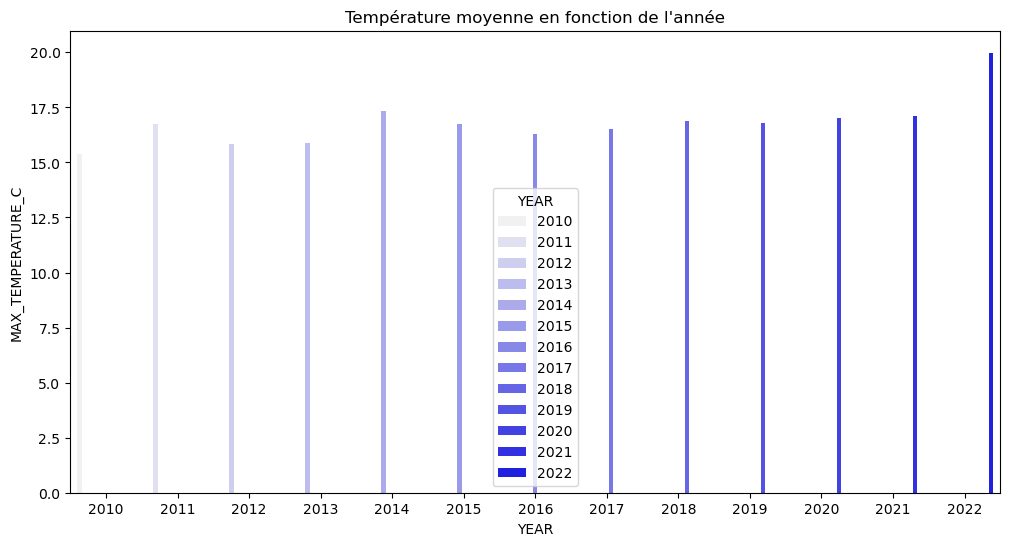

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# MAX_TEMPERATURE_C
# Copie du dataframe car nous allons changer sa structure
dftotal_big2 = dftotal_big.copy()

# Convertir l'index en colonne
dftotal_big2.reset_index(inplace=True)

# Extraire l'année à partir de la colonne DATE
dftotal_big2['YEAR'] = dftotal_big2['DATE'].dt.year

# Filtrer les données où la température est supérieure à 0
df_temp = dftotal_big2[dftotal_big2["MAX_TEMPERATURE_C"] > 0]

# Calculer la moyenne de la température par an
# avec un reset_index pour avoir un index numérique standard (0,1,2,...)
# car le groupby peut désorganiser l'index du df
df_temp_mean = df_temp.groupby(
    "YEAR")["MAX_TEMPERATURE_C"].mean().reset_index()

# Créer le graphique
plt.figure(figsize=(12, 6))
sns.barplot(x="YEAR", y="MAX_TEMPERATURE_C",
            data=df_temp_mean, hue='YEAR', color="b")
plt.title("Température moyenne en fonction de l'année")
plt.show()

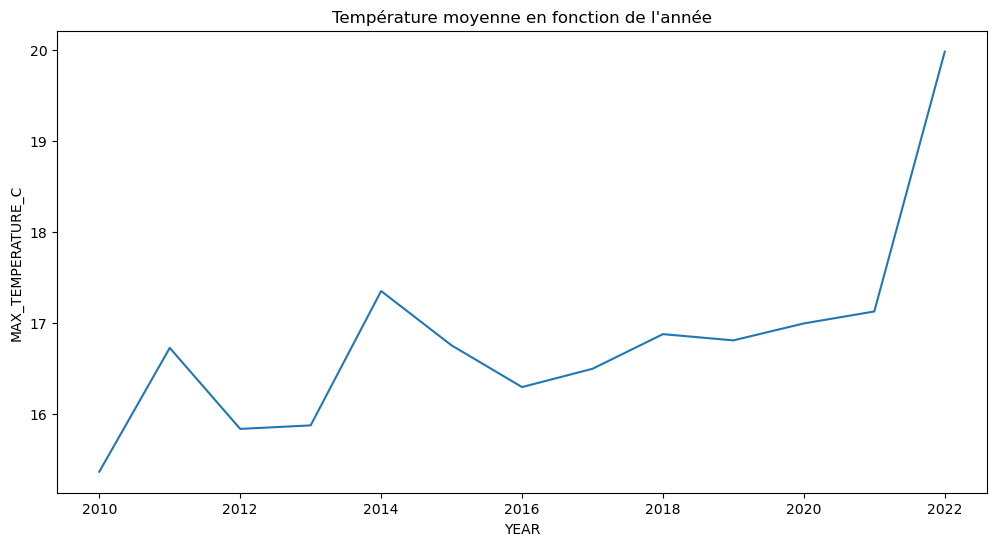

In [128]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="YEAR", y="MAX_TEMPERATURE_C", data=df_temp_mean)
plt.title("Température moyenne en fonction de l'année")
plt.show()

In [37]:
liste_colonnes = dftotal_big.columns.to_list()
print(liste_colonnes)

['MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH', 'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C', 'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM', 'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C', 'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM', 'UV_INDEX', 'SUNHOUR', 'OPINION', 'WEATHER_CODE_MORNING', 'WEATHER_CODE_NOON', 'MONTH', 'DAY', 'SUNSET', 'SUNRISE', 'TEMPERATURE_NIGHT_C', 'flag']


In [41]:
liste_colonnes = ['MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH', 'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C', 'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM', 'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT',
                  'HEATINDEX_MAX_C', 'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM', 'UV_INDEX', 'SUNHOUR', 'OPINION', 'WEATHER_CODE_MORNING', 'WEATHER_CODE_NOON', 'MONTH', 'DAY', 'SUNSET', 'SUNRISE', 'TEMPERATURE_NIGHT_C', 'flag']

col_to_drop = ['TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',  'VISIBILITY_AVG_KM',  'CLOUDCOVER_AVG_PERCENT',
               'DEWPOINT_MAX_C', 'WEATHER_CODE_EVENING', 'SUNHOUR', 'OPINION', 'WEATHER_CODE_MORNING', 'SUNSET', 'SUNRISE', 'flag', 'WEATHER_CODE_NOON', 'DAY', 'MONTH']

col_to_keep = list(set(liste_colonnes)-set(col_to_drop))

print(col_to_keep)

['MIN_TEMPERATURE_C', 'PRECIP_TOTAL_DAY_MM', 'HEATINDEX_MAX_C', 'UV_INDEX', 'PRESSURE_MAX_MB', 'WINDSPEED_MAX_KMH', 'HUMIDITY_MAX_PERCENT', 'WINDTEMP_MAX_C', 'MAX_TEMPERATURE_C', 'TEMPERATURE_NIGHT_C', 'TOTAL_SNOW_MM']


c:\ProgramData\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1200x600 with 0 Axes>

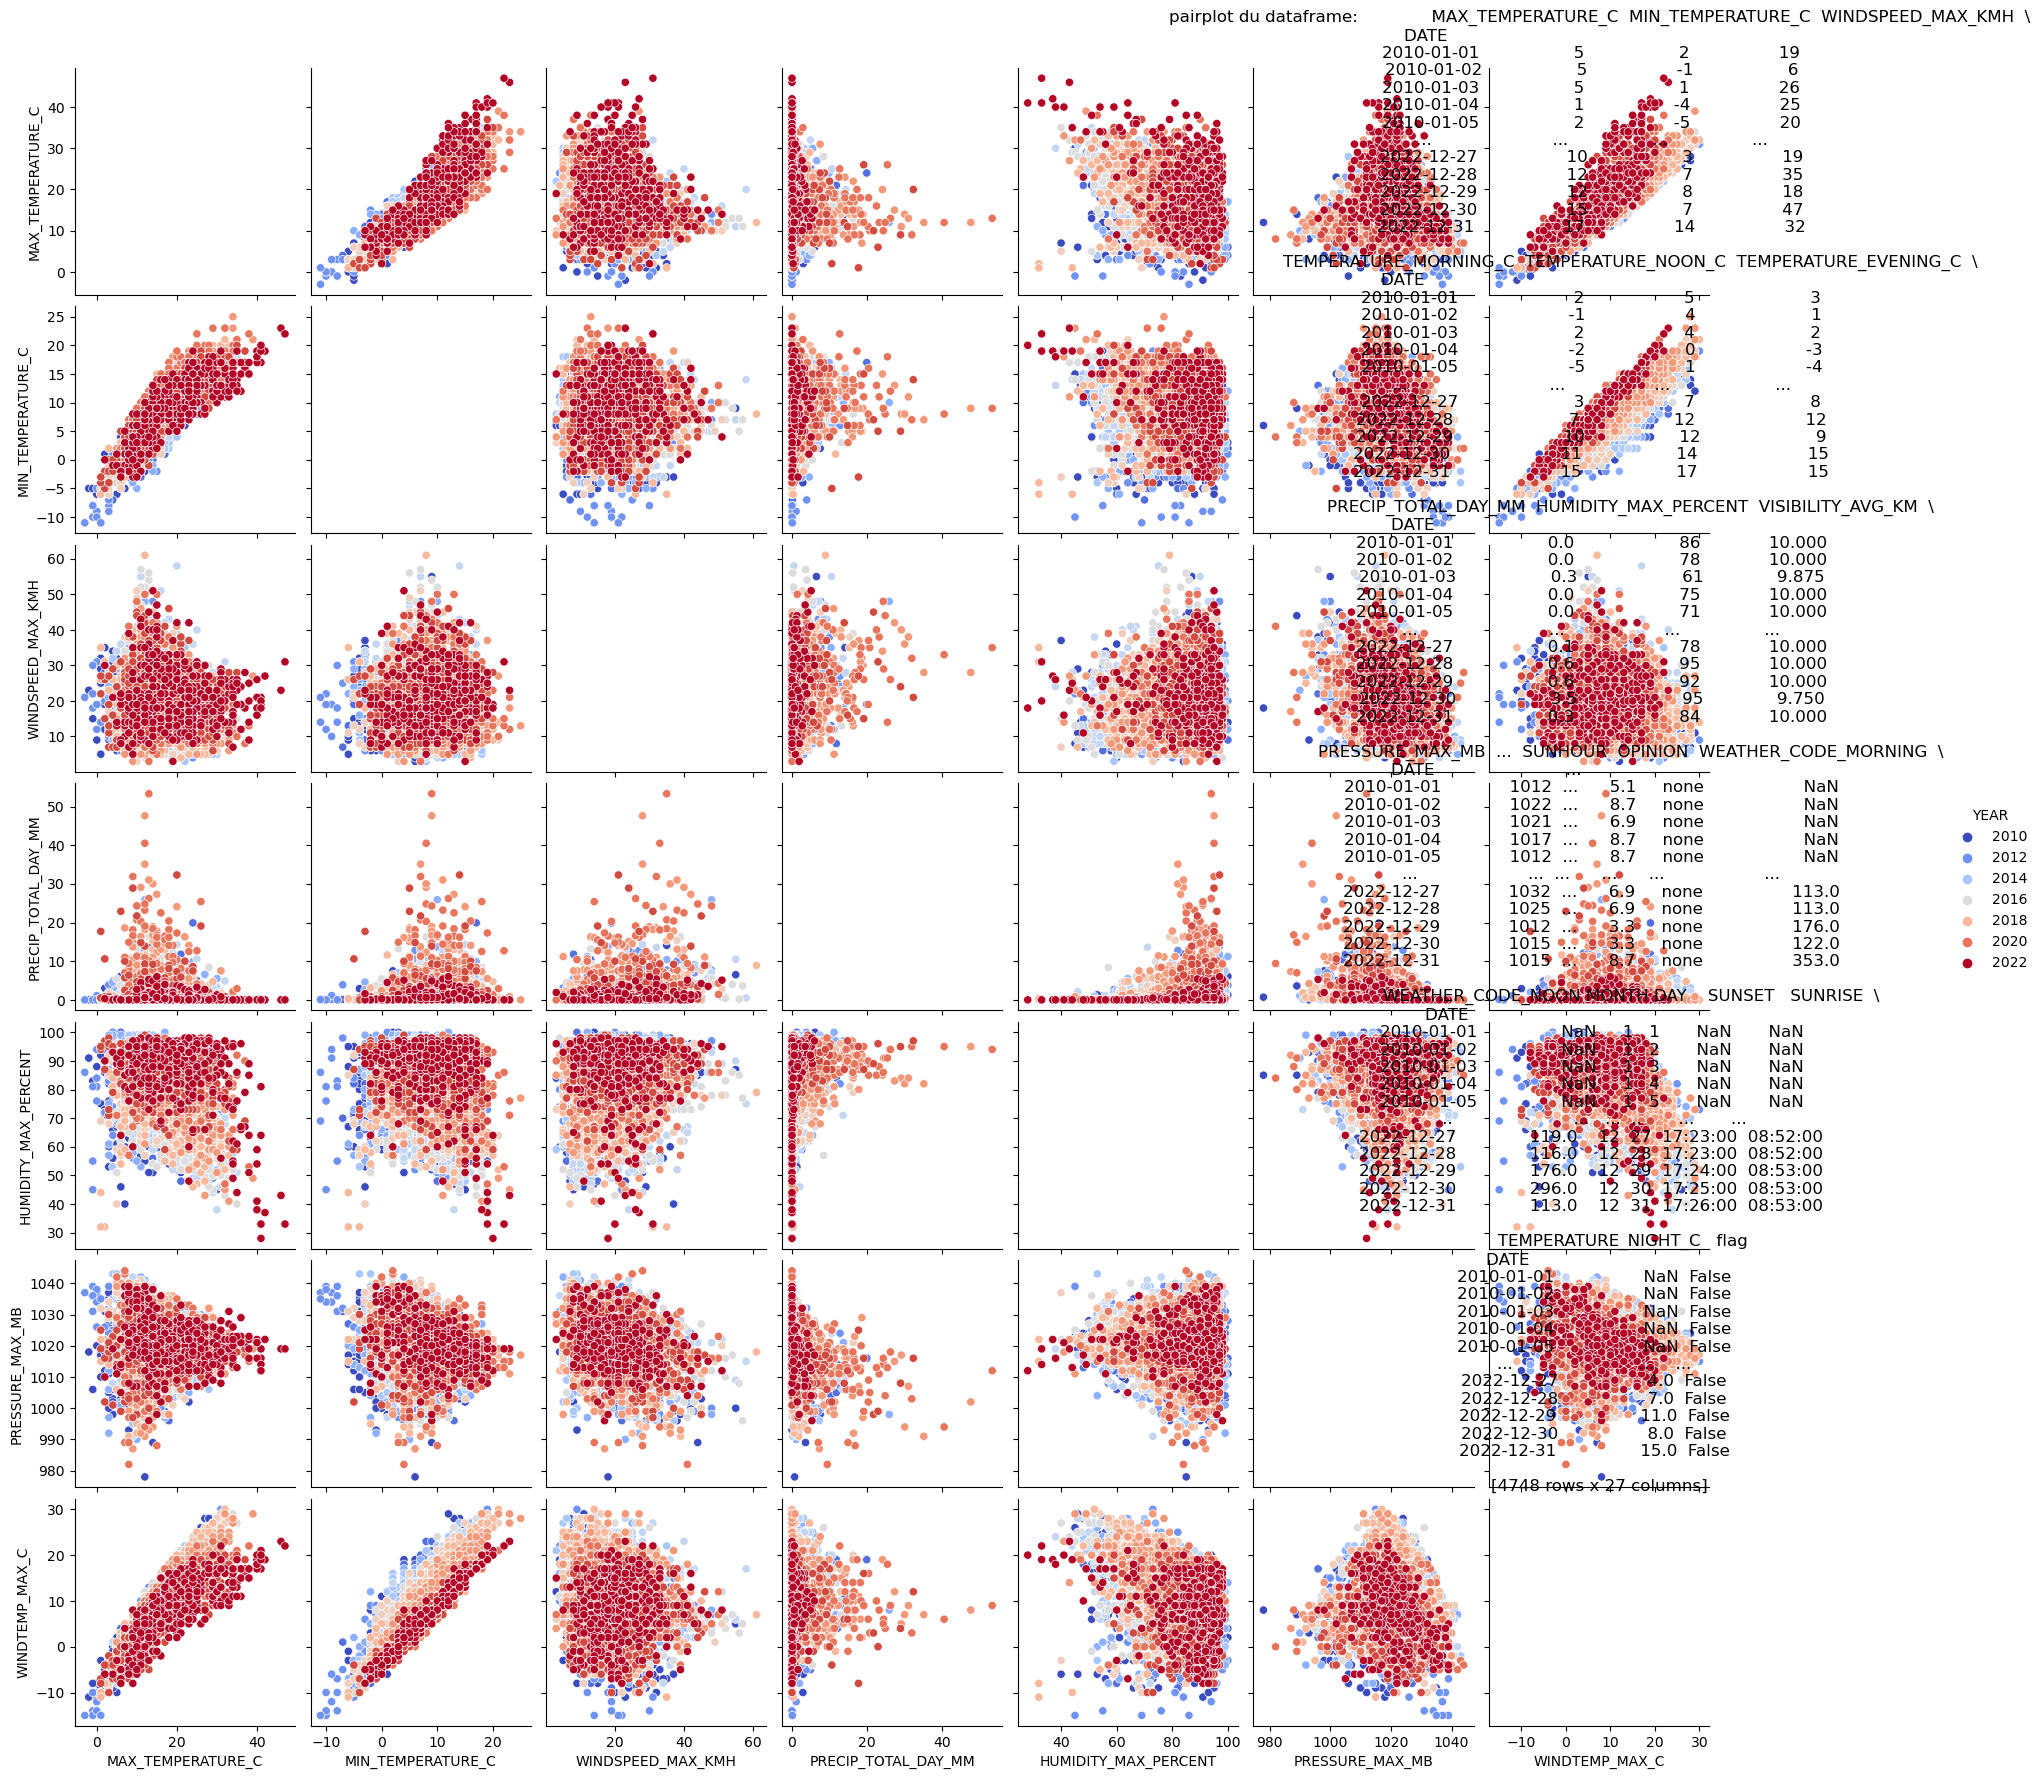

In [47]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Copie du dataframe car nous allons changer sa structure
dftotal_big2 = dftotal_big.copy()

# Convertir l'index en colonne
dftotal_big2.reset_index(inplace=True)

# Extraire l'année à partir de la colonne DATE
dftotal_big2['YEAR'] = dftotal_big2['DATE'].dt.year


# suppression des colonnes sans interet:
liste_colonnes = dftotal_big.columns.to_list()
# liste_colonnes = ['MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH', 'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C', 'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM', 'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT',
#                   'HEATINDEX_MAX_C', 'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM', 'UV_INDEX', 'SUNHOUR', 'OPINION', 'WEATHER_CODE_MORNING', 'WEATHER_CODE_NOON', 'MONTH', 'DAY', 'SUNSET', 'SUNRISE', 'TEMPERATURE_NIGHT_C', 'flag']

col_to_drop = ['TEMPERATURE_MORNING_C', 'HEATINDEX_MAX_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',  'VISIBILITY_AVG_KM',  'CLOUDCOVER_AVG_PERCENT',
               'DEWPOINT_MAX_C', 'WEATHER_CODE_EVENING', 'SUNHOUR', 'OPINION', 'WEATHER_CODE_MORNING', 'SUNSET', 'SUNRISE', 'flag', 'WEATHER_CODE_NOON', 'DAY', 'MONTH']

col_to_keep = list(set(liste_colonnes)-set(col_to_drop))

dftotal_big2.drop(columns=col_to_drop, inplace=True)

# Suppression des colonnes avec des valeurs manquantes
df_clean = dftotal_big2.dropna(axis=1)
# Garder uniquement les colonnes avec des données numériques
df_numeric = df_clean.select_dtypes(include=[np.number])

# # Calcul de la matrice de corrélation
# corr_matrix = df_numeric.corr()


plt.figure(figsize=(12, 6))
sns.pairplot(data=df_numeric, diag_kind='reg', kind="scatter",
             hue='YEAR', palette='coolwarm')
# avec regression linéaire
# sns.pairplot(data=df_numeric, kind='reg',
#              hue='YEAR', palette='coolwarm')
plt.title(f"pairplot du dataframe:  {dftotal_big}")
plt.show()

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Copie du dataframe car nous allons changer sa structure
dftotal_big2 = dftotal_big.copy()

# Convertir l'index en colonne
dftotal_big2.reset_index(inplace=True)

# Extraire l'année à partir de la colonne DATE
dftotal_big2['YEAR'] = dftotal_big2['DATE'].dt.year


# suppression des colonnes sans interet:
liste_colonnes = dftotal_big.columns.to_list()
# liste_colonnes = ['MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH', 'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C', 'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM', 'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT',
#                   'HEATINDEX_MAX_C', 'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM', 'UV_INDEX', 'SUNHOUR', 'OPINION', 'WEATHER_CODE_MORNING', 'WEATHER_CODE_NOON', 'MONTH', 'DAY', 'SUNSET', 'SUNRISE', 'TEMPERATURE_NIGHT_C', 'flag']

col_to_drop = ['TEMPERATURE_MORNING_C', 'HEATINDEX_MAX_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',  'VISIBILITY_AVG_KM',  'CLOUDCOVER_AVG_PERCENT',
               'DEWPOINT_MAX_C', 'WEATHER_CODE_EVENING', 'SUNHOUR', 'OPINION', 'WEATHER_CODE_MORNING', 'SUNSET', 'SUNRISE', 'flag', 'WEATHER_CODE_NOON', 'DAY', 'MONTH']

col_to_keep = list(set(liste_colonnes)-set(col_to_drop))
col_to_keep = ['MAX_TEMPERATURE_C', 'WINDSPEED_MAX_KMH', 'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'PRESSURE_MAX_MB',
               'TOTAL_SNOW_MM']

dftotal_big2.drop(columns=col_to_drop, inplace=True)

# Suppression des colonnes avec des valeurs manquantes
df_clean = dftotal_big2.dropna(axis=1)
# Garder uniquement les colonnes avec des données numériques
df_numeric = df_clean.select_dtypes(include=[np.number])


plt.figure(figsize=(12, 6))
df = df_numeric

# Créer le PairGrid avec l'argument hue
# g = sns.PairGrid(df)
g = sns.PairGrid(df, hue='YEAR', palette='coolwarm')
g = sns.color_palette("coolwarm")

# Utiliser plt.scatter et sns.kdeplot avec les arguments corrects
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_diag(sns.kdeplot, lw=3, legend=False)

# Ajouter une légende
g.add_legend()

plt.show()

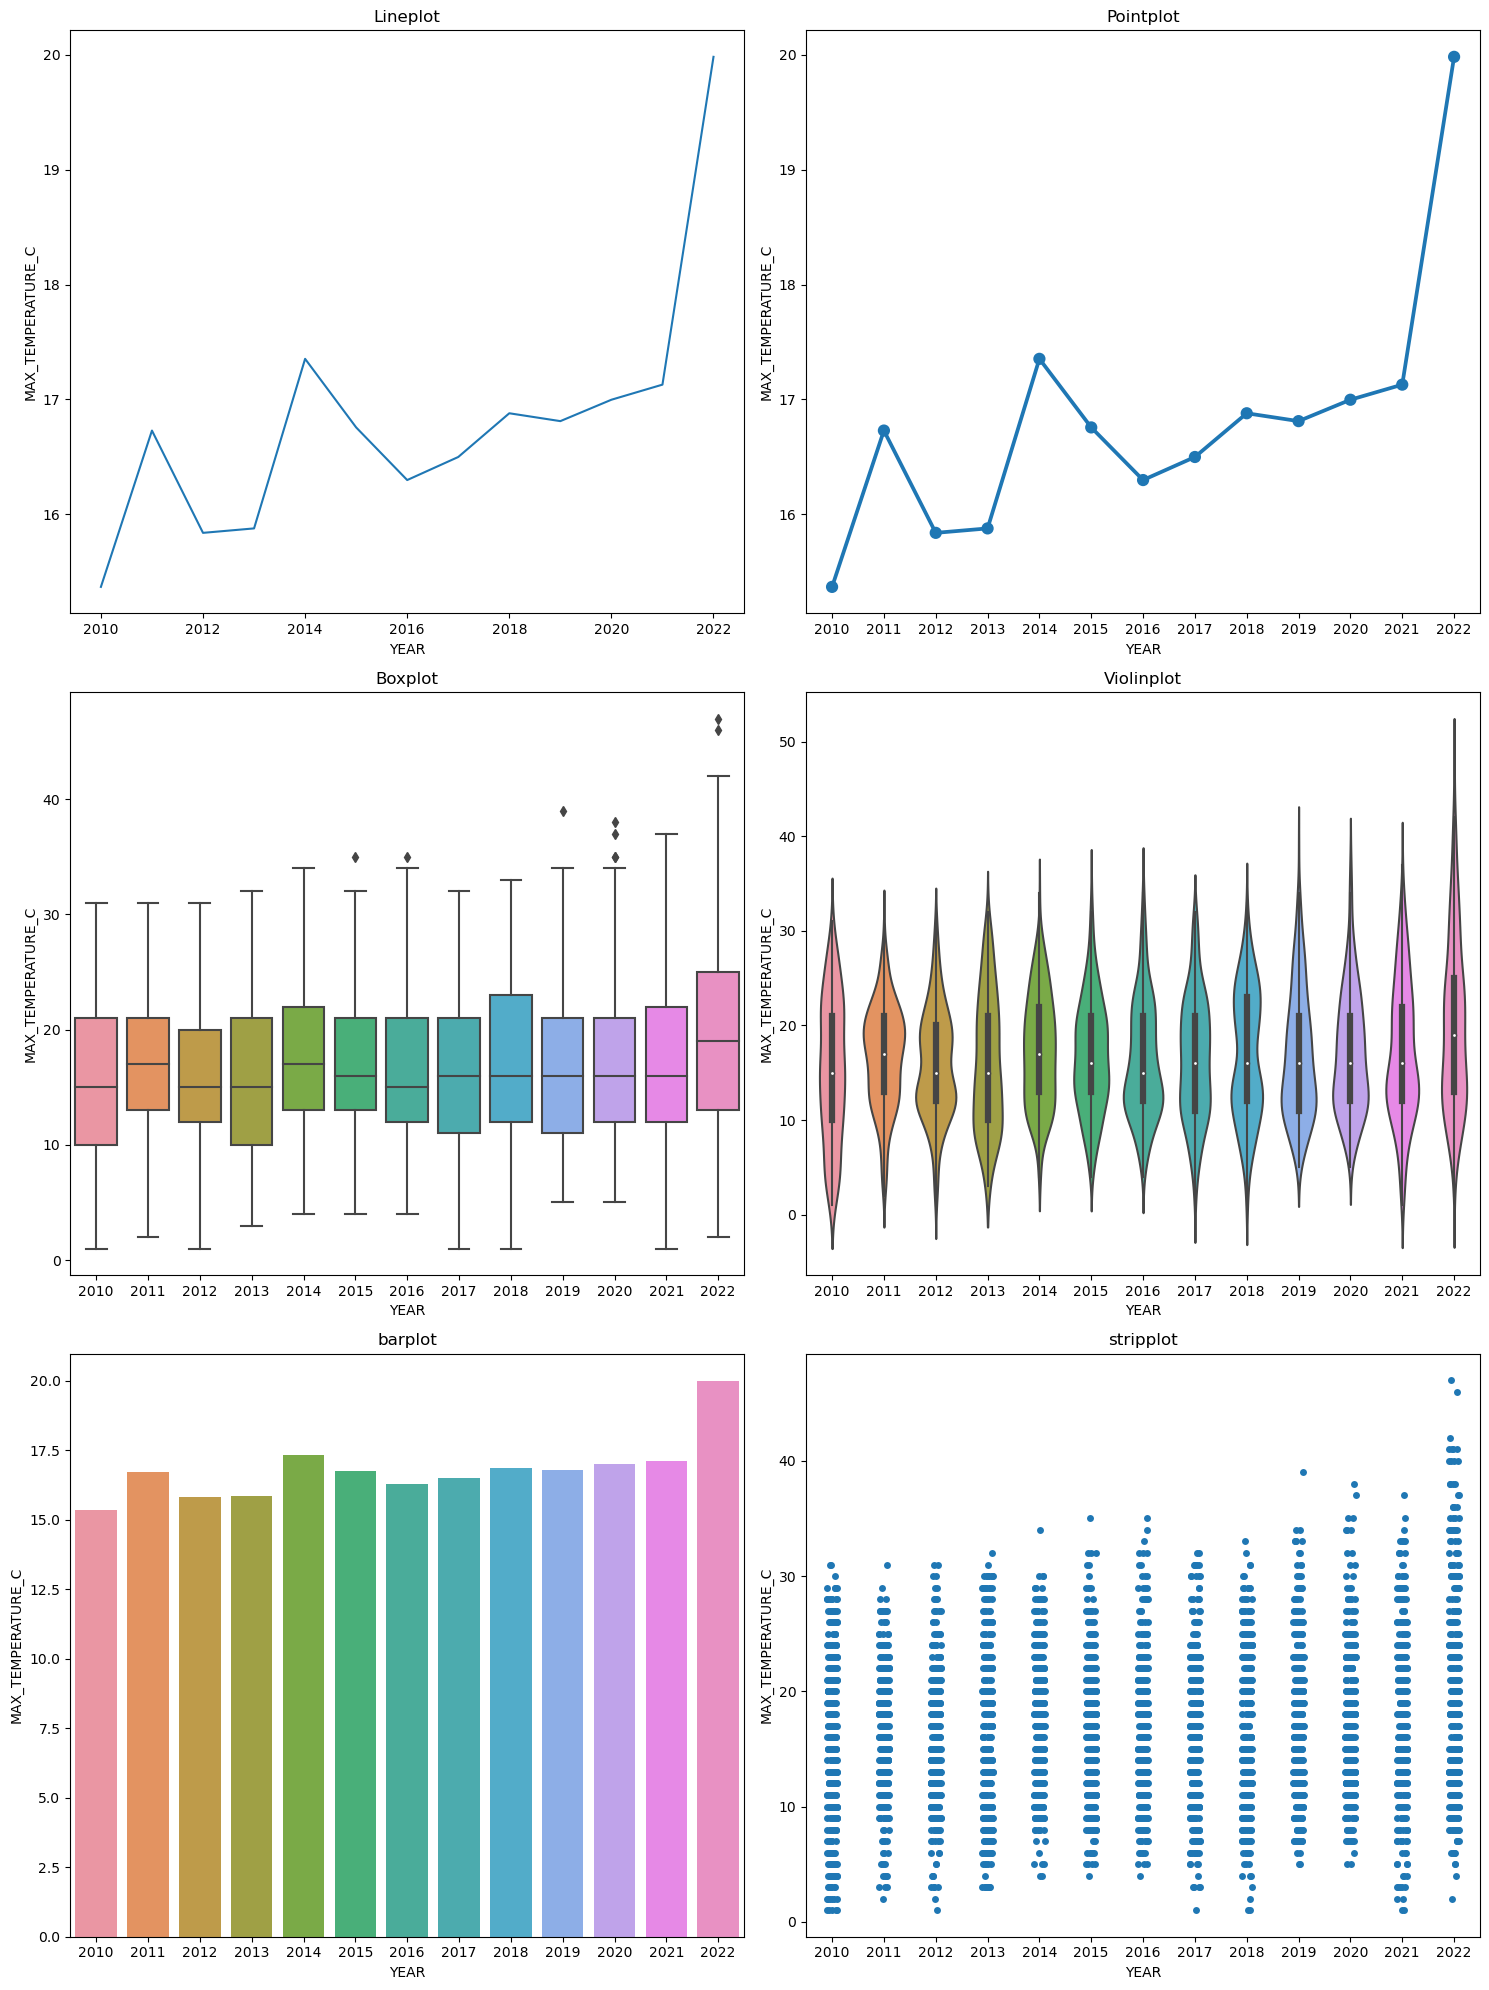

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

# MAX_TEMPERATURE_C
# Copie du dataframe car nous allons changer sa structure
dftotal_big2 = dftotal_big.copy()

# Convertir l'index en colonne
dftotal_big2.reset_index(inplace=True)

# Extraire l'année à partir de la colonne DATE
dftotal_big2['YEAR'] = dftotal_big2['DATE'].dt.year

# Filtrer les données où la température est supérieure à 0
df_temp = dftotal_big2[dftotal_big2["MAX_TEMPERATURE_C"] > 0]

# Calculer la moyenne de la température par an
# avec un reset_index pour avoir un index numérique standard (0,1,2,...)
# car le groupby peut désorganiser l'index du df
df_temp_mean = df_temp.groupby(
    "YEAR")["MAX_TEMPERATURE_C"].mean().reset_index()

# Créer une figure avec 5 lignes et 2 colonnes
fig, axs = plt.subplots(3, 2, figsize=(15, 20))

# Lineplot
sns.lineplot(x="YEAR", y="MAX_TEMPERATURE_C", data=df_temp_mean, ax=axs[0, 0])
axs[0, 0].set_title("Lineplot")

# Pointplot
sns.pointplot(x="YEAR", y="MAX_TEMPERATURE_C", data=df_temp_mean, ax=axs[0, 1])
axs[0, 1].set_title("Pointplot")

# Boxplot
sns.boxplot(x="YEAR", y="MAX_TEMPERATURE_C", data=df_temp, ax=axs[1, 0])
axs[1, 0].set_title("Boxplot")

# Violinplot
sns.violinplot(x="YEAR", y="MAX_TEMPERATURE_C", data=df_temp, ax=axs[1, 1])
axs[1, 1].set_title("Violinplot")


# barplot
sns.barplot(x="YEAR", y="MAX_TEMPERATURE_C", data=df_temp_mean, ax=axs[2, 0])
axs[2, 0].set_title("barplot")

# stripplot
sns.stripplot(x="YEAR", y="MAX_TEMPERATURE_C", data=df_temp, ax=axs[2, 1])
axs[2, 1].set_title("stripplot")

# Supprimer les sous-graphiques vides
# for i in range(2, 4):
#     for j in range(2):
#         fig.delaxes(axs[i, j])

plt.tight_layout()
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd
# # del dftotal_big
# dftotal_2 = dftotal_big.copy()
# # column_name='MAX_TEMPERATURE_C'
# # df = dftotal_2
# # df[column_name] = df[column_name].fillna(method='ffill', inplace=True)
# # df[column_name] = df[column_name].fillna(method='bfill', inplace=True)
# # Remplir les valeurs manquantes restantes avec 0
# # df[column_name] = df[column_name].fillna(0, inplace=True)

# # Assurez-vous que votre colonne 'DATE' est au format datetime
# # dftotal_2['DATE'] = pd.to_datetime(dftotal_2['DATE'], errors='coerce')
# # Créez une nouvelle colonne 'YEAR' en extrayant l'année de la colonne 'DATE'
# dftotal_2['YEAR'] = dftotal_2['DATE'].dt.year

# # Triez votre DataFrame par année
# dftotal_2 = dftotal_2.sort_values('YEAR')

# # Créez le scatterplot
# plt.figure(figsize=(10, 6))
# plt.scatter(dftotal_2['YEAR'], dftotal_2['MAX_TEMPERATURE_C'])

# # Définissez les titres et les labels
# plt.title('Scatterplot of MAX_TEMPERATURE_C over time')
# plt.xlabel('Year')
# plt.ylabel('MAX_TEMPERATURE_C')

# # Affichez le scatterplot
# plt.show()


## Find appropriate dataviz to answer to this question : 
 Which year had the best weather? Are years very different or not ?

ma réponse:
##### cela dépend ce qu'on entend par le best weather, l'année où il y a eu le mois de pluie et de vent avec une température moyenne "normale", d'aprés les graphes 2012 et 2013 semblent être des années "agréables"
2022 apparait comme un année historiquement chaude avec presque 3 degré de plus !
2016 est une année particuliérement ventueuse
2019 et 2020 sont des années particuliérement humides

## SOURCES

### Application des mêmes filtres et merge que pour la base df2018